# Youtube Channel Analysis

### Import necessary Libraries

In [217]:
import pandas as pd
from pandas import DataFrame as df
from dotenv import load_dotenv
import os
from googleapiclient.discovery import build
import seaborn as sn
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

### Get Channel ID's        

In [218]:
# Load the api key from .env file
load_dotenv()
# Access the API key from .env file
api_key = os.getenv("API_KEY")


# To get channel id, go to view page source, search channel/ and find the Channel ID from there
channel_ids = ['UCnz-ZXXER4jOvuED5trXfEA',  # techTFQ
            'UCLLw7jmFsvfIVaUFsLs8mlQ',     # Luke Barousse 
            'UCh9nVJoWXmFb7sLApWGcLPQ',     # Code Basics
            'UCJtUOos_MwJa_Ewii-R3cJA',     # Leila Gharani 
            'UC8uU_wruBMHeeRma49dtZKA',     # Chandoo 
            'UCeVMnSShP_Iviwkknt83cww'      # Code With Harry
            ]  
# Got credentials and create an API Client object
api_service_name = 'youtube'
api_version = 'v3'

youtube = build(api_service_name, api_version, developerKey=api_key)



#### Get Channel Details

In [219]:
# For MULTIPLE Channels

# Function to get channel statistics for a given channel
def get_channel_stats(youtube, channel_ids):
    all_data = []
    # def get_channel_stats(youtube, channel_ids):
    requests = youtube.channels().list(
        part = 'snippet,contentDetails, statistics',
        # id = channel_id
        id = ','.join(channel_ids)    # As channel_ids is a list, we need to join all the channel ids into a string
    )
    response = requests.execute()

    for i in range(len(response['items'])):
        data = dict(Channel_Name = response['items'][i]['snippet']['title'],
                #Channel_Creation = response['items'][i]['snippet']['publishedAt'],
                Total_Views = response['items'][i]['statistics']['viewCount'],
                Total_Subscribers = response['items'][i]['statistics']['subscriberCount'],
                Total_Videos = response['items'][i]['statistics']['videoCount'],
                PlayList_Id = response['items'][i]['contentDetails']['relatedPlaylists']['uploads'],
                DateStarted= response['items'][i]['snippet']['publishedAt'],
                #Comments = response['items'][i]['statistics']['commentCount'],
                )
        all_data.append(data)
    return all_data
    #return response 
channel_statistics = get_channel_stats(youtube, channel_ids)

In [220]:
channel_data = df(channel_statistics)
channel_data

,Channel_Name,Total_Views,Total_Subscribers,Total_Videos,PlayList_Id,DateStarted
0,techTFQ,11298145,224000,91,UUnz-ZXXER4jOvuED5trXfEA,2020-06-13T05:20:37.182391Z
1,Chandoo,39001626,503000,436,UU8uU_wruBMHeeRma49dtZKA,2009-05-02T06:44:42Z
2,Luke Barousse,17184997,368000,137,UULLw7jmFsvfIVaUFsLs8mlQ,2020-08-03T09:02:41.213077Z
3,codebasics,56788542,832000,613,UUh9nVJoWXmFb7sLApWGcLPQ,2015-11-07T17:29:46Z
4,CodeWithHarry,601659194,4320000,2108,UUeVMnSShP_Iviwkknt83cww,2018-04-28T14:50:54Z
5,Leila Gharani,215676194,2330000,550,UUJtUOos_MwJa_Ewii-R3cJA,2015-08-11T10:54:25Z


### Now let's Check the Data Types of each column

In [221]:
channel_data.dtypes

Channel_Name         object
Total_Views          object
Total_Subscribers    object
Total_Videos         object
PlayList_Id          object
DateStarted          object
dtype: object

As we can see, the Data Types of columns Total_Views, Total_Subscribers, Total_Videos are object.
Let's convert them to int


In [222]:
# Convert the data types of column total_views, total_subscribers and total_videos  to integer 
channel_data['Total_Views'] = pd.to_numeric(channel_data['Total_Views'])
channel_data['Total_Subscribers'] = pd.to_numeric(channel_data['Total_Subscribers'])
channel_data['Total_Videos'] = pd.to_numeric(channel_data['Total_Videos'])


# Convert DateStarted to datetime for techTFQ and Luke Barousse
mask = channel_data['Channel_Name'].isin(['techTFQ', 'Luke Barousse'])
channel_data.loc[mask, 'DateStarted'] = pd.to_datetime(channel_data.loc[mask, 'DateStarted'], format='%Y-%m-%dT%H:%M:%S.%fZ').dt.date

# Define the channels to exclude
exclude_channels = ['techTFQ', 'Luke Barousse']
# Convert DateStarted to datetime for channels other than techTFQ and Luke Barousse
channel_data.loc[~channel_data['Channel_Name'].isin(exclude_channels), 'DateStarted'] = pd.to_datetime(channel_data.loc[~channel_data['Channel_Name'].isin(exclude_channels), 'DateStarted'], format='%Y-%m-%dT%H:%M:%SZ').dt.date

# Now let;s convert the DateStarted to a datetime object 
channel_data['DateStarted'] = pd.to_datetime(channel_data['DateStarted'])

channel_data.dtypes

Channel_Name                 object
Total_Views                   int64
Total_Subscribers             int64
Total_Videos                  int64
PlayList_Id                  object
DateStarted          datetime64[ns]
dtype: object

#### Save the data into a CSV file

In [223]:
channel_data.to_csv('channel_data.csv')

###  Now let's do some EDA 

#### General Stats

In [224]:
channel_data

,Channel_Name,Total_Views,Total_Subscribers,Total_Videos,PlayList_Id,DateStarted
0,techTFQ,11298145,224000,91,UUnz-ZXXER4jOvuED5trXfEA,2020-06-13
1,Chandoo,39001626,503000,436,UU8uU_wruBMHeeRma49dtZKA,2009-05-02
2,Luke Barousse,17184997,368000,137,UULLw7jmFsvfIVaUFsLs8mlQ,2020-08-03
3,codebasics,56788542,832000,613,UUh9nVJoWXmFb7sLApWGcLPQ,2015-11-07
4,CodeWithHarry,601659194,4320000,2108,UUeVMnSShP_Iviwkknt83cww,2018-04-28
5,Leila Gharani,215676194,2330000,550,UUJtUOos_MwJa_Ewii-R3cJA,2015-08-11


In [225]:
pd.set_option('float_format', '{:.1f}'.format)

channel_data.describe()

,Total_Views,Total_Subscribers,Total_Videos,DateStarted
count,6.0,6.0,6.0,6
mean,156934783.0,1429500.0,655.8,2016-09-09 16:00:00
min,11298145.0,224000.0,91.0,2009-05-02 00:00:00
25%,22639154.2,401750.0,211.8,2015-09-02 00:00:00
50%,47895084.0,667500.0,493.0,2017-01-31 12:00:00
75%,175954281.0,1955500.0,597.2,2019-12-01 18:00:00
max,601659194.0,4320000.0,2108.0,2020-08-03 00:00:00
std,230611312.5,1610050.4,742.7,NaN


In [226]:
channel_data.shape

(6, 6)

##### So we have 6 channels to analyze, and to each 8 attributes.

In [227]:
import pandas as pd

# Assuming you have loaded the data into a DataFrame called channel_data
channel_data = pd.read_csv('channel_data.csv')

# Calculate the total number of videos
total_videos = channel_data['Total_Videos'].sum()

print("Total number of videos:", total_videos)


Total number of videos: 3935


#### Channel Creation Year

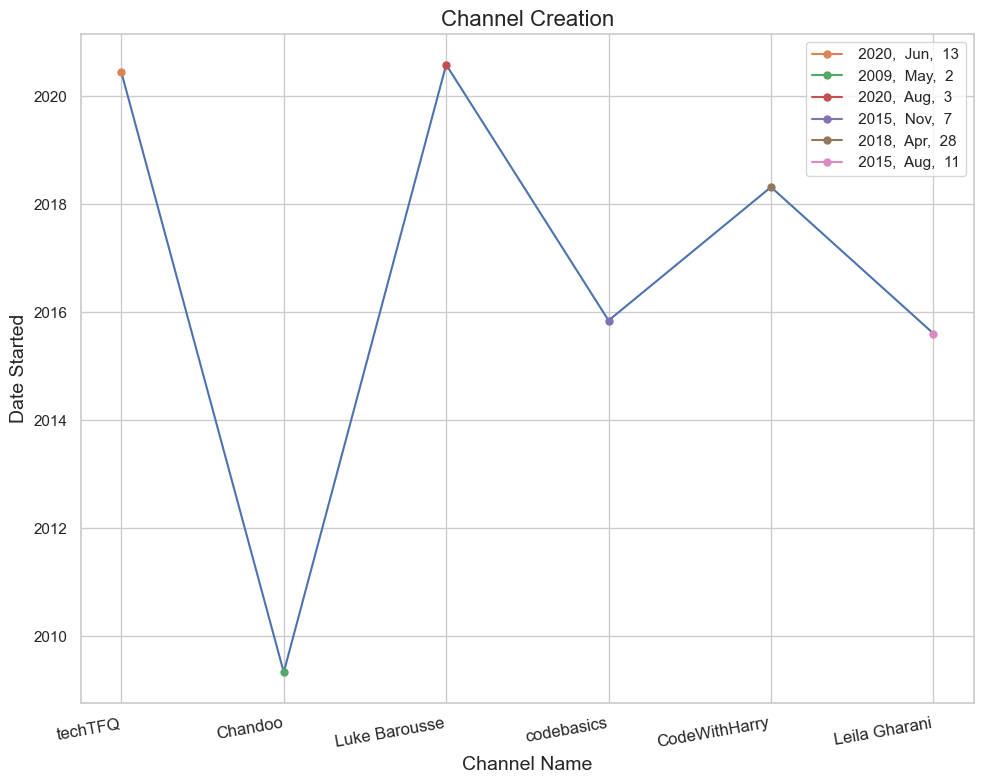

In [228]:
# Load your data into a DataFrame
channel_data = pd.read_csv('channel_data.csv')

# Convert 'DateStarted' column to datetime
channel_data['DateStarted'] = pd.to_datetime(channel_data['DateStarted'])

plt.figure(figsize=(10, 8))
plt.xticks(rotation=90)

# Create a color palette
#color_palette = sns.color_palette("Reds", len(channel_data))

fprop = fm.FontProperties(fname='NotoSansCJKtc-Regular.otf')
names = channel_data['Channel_Name']

# Create the line plot
fig = sns.lineplot(x=channel_data['Channel_Name'], y=channel_data['DateStarted'])

# Add markers with respective years
for i, row in channel_data.iterrows():
    year = row['DateStarted'].year
    month = row['DateStarted'].strftime('%b')
    day = row['DateStarted'].day
    plt.plot(row['Channel_Name'], row['DateStarted'], marker='o', markersize=5, label=f' {year},  {month},  {day}')      # color=color_palette[i]  We can add color_palette also to plot

# Set plot title and labels
plt.title("Channel Creation", fontsize=16)
plt.xlabel("Channel Name", fontsize=14)
plt.ylabel("Date Started", fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=10, ha="right", fontsize=12)

# Add legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


#### Let's create some basic distribution charts

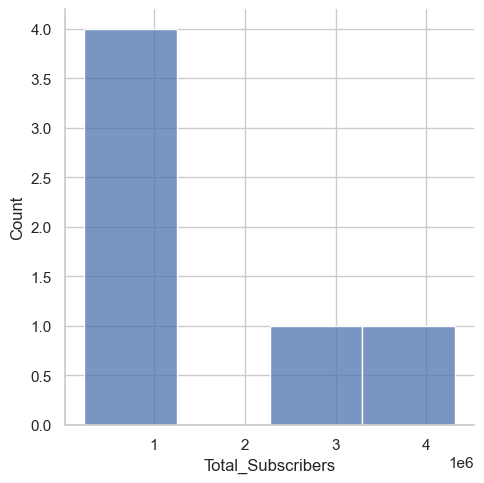

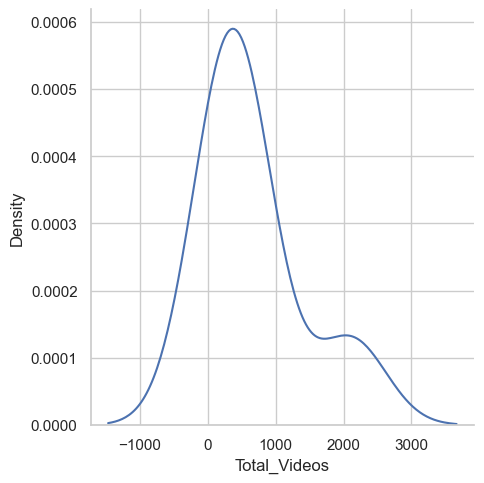

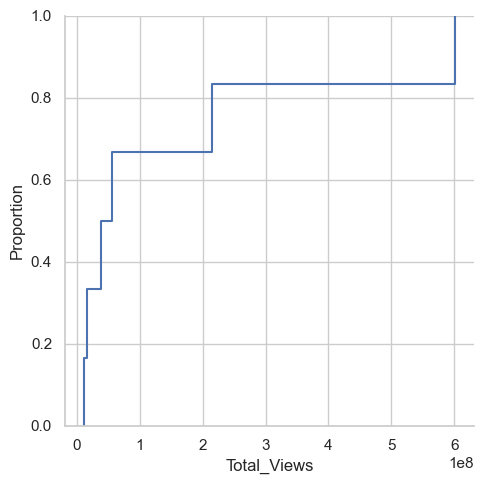

In [229]:
# Checking the distribution of the number of subscribers.
sns.displot(channel_data, x='Total_Subscribers' , kind='hist' )

# Checking the distribution of the number of videos.
sns.displot(channel_data, x='Total_Videos' , kind='kde')

# Checking the distribution of the number of views.
sns.displot(channel_data, x='Total_Views' , kind='ecdf')
#sns.displot(channel_data, x='Total_Views' , kind='hist')

 We can see that 75% of the channels, or 4 channels, have fewer than 1.5 million subscribers. <br />
 In addition, five channels have fewer than 1000 total videos, with one outlier having more than 2000 videos. <br />
 Similarly, 5 channels have less than 300 million views, but one outlier has more than 600 million views.


####  Number of  Subscribers by Channel

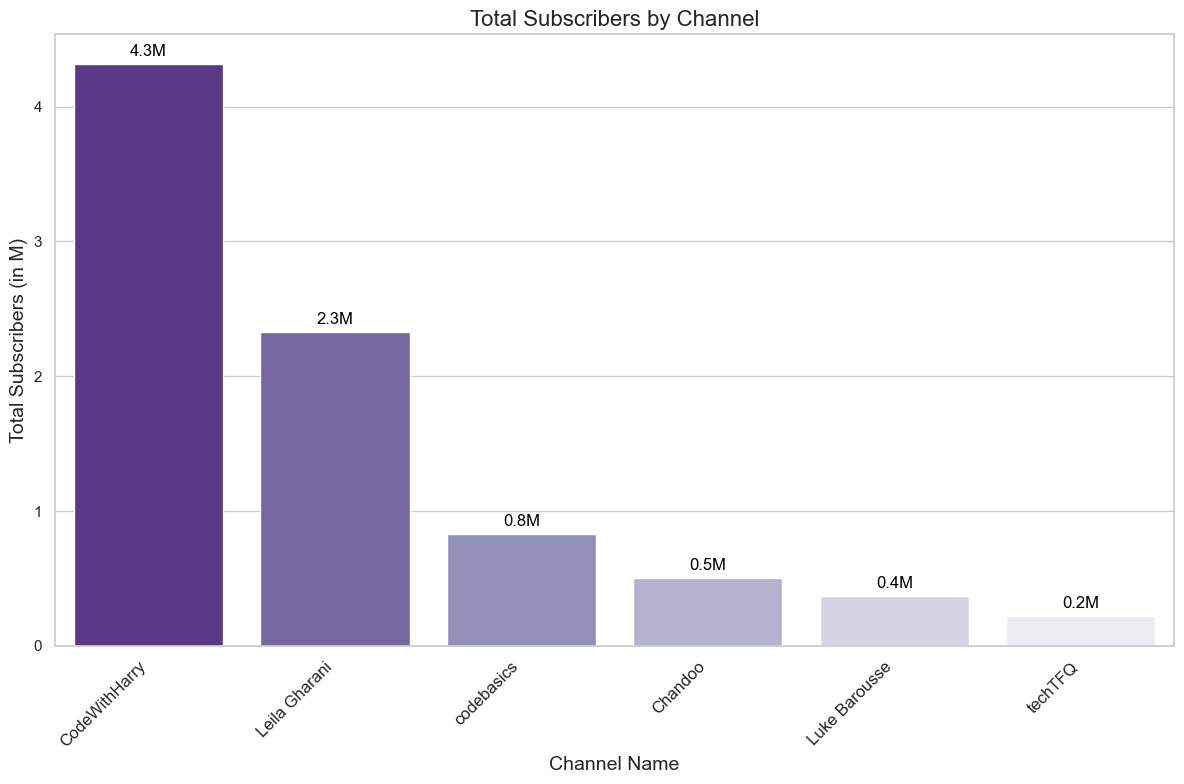

In [230]:
# #Create a fixed color palette for the Total Subscribers chart
# color_palette = [sns.color_palette("Set2")[0]]

# Convert subscribers to millions (in M)
channel_data["Total_Subscribers_M"] = channel_data["Total_Subscribers"] / 1000000

# Create a bar chart for Total Subscribers
def create_total_subscribers_chart():
    plt.figure(figsize=(12, 8))

    # Order the bars based on Total Subscribers
    channel_data_sorted = channel_data.sort_values(by="Total_Subscribers_M", ascending=False)

    # Create the bar plot with the fixed color palette
    ax = sns.barplot(x="Channel_Name", y="Total_Subscribers_M", data=channel_data_sorted, palette = "Purples_r")

    # Set plot title and labels
    plt.title("Total Subscribers by Channel", fontsize=16)
    plt.xlabel("Channel Name", fontsize=14)
    plt.ylabel("Total Subscribers (in M)", fontsize=14)  # Modify y-axis label

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45, ha="right", fontsize=12)

    # Add data labels on top of the bars with "M" suffix
    for p in ax.patches:
        ax.annotate(f"{format(p.get_height(), '.1f')}M",  # Display "M" along with the number
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha="center", va="center", 
                    xytext=(0, 9), 
                    textcoords="offset points",
                    fontsize=12,
                    color="black")

    # Show the plot
    plt.tight_layout()
    plt.show()

# Call the function for Total Subscribers chart
create_total_subscribers_chart()

#### Number of Views by Channel

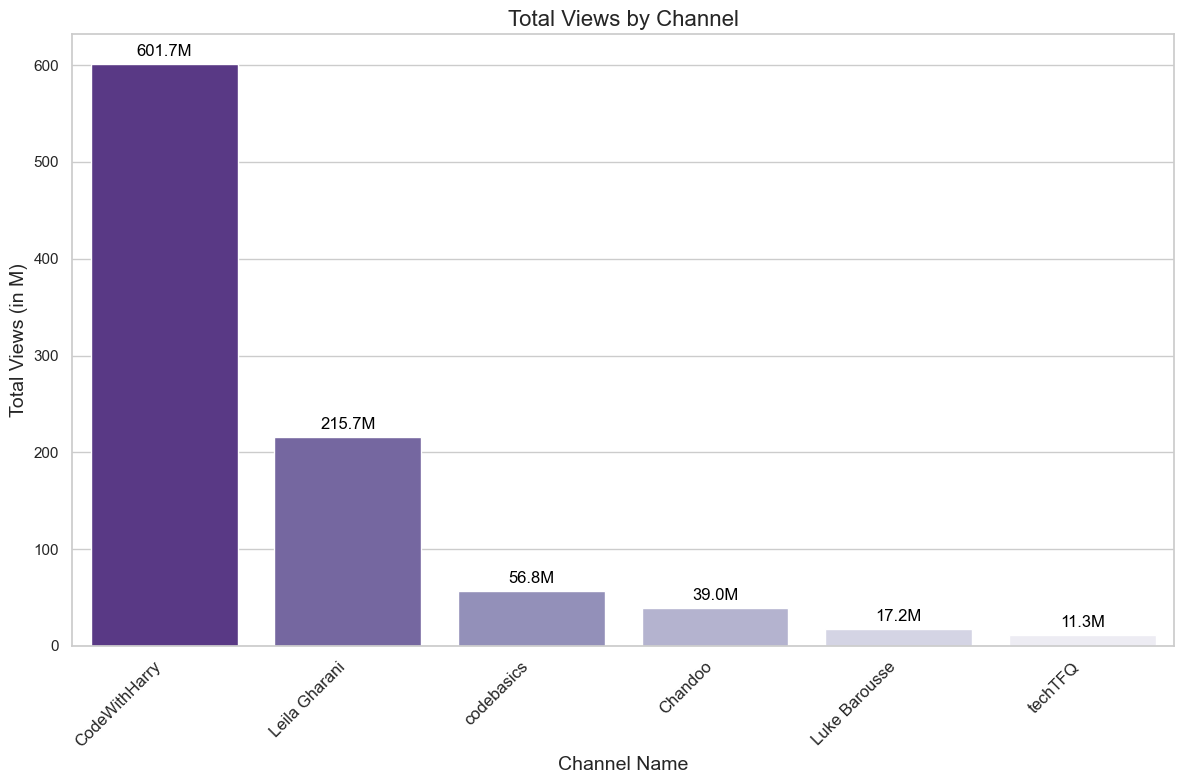

In [231]:
# # Create a fixed color palette for the Total Subscribers chart
# color_palette = [sns.color_palette("Set2")[0]]

# Convert subscribers to millions (in M)
channel_data["Total_Views_M"] = channel_data["Total_Views"] / 1000000

# Create a bar chart for Total Subscribers
def create_total_views_chart():
    plt.figure(figsize=(12, 8))

    # Order the bars based on Total Subscribers
    channel_data_sorted = channel_data.sort_values(by="Total_Views_M", ascending=False)

    # Create the bar plot with the fixed color palette
    ax = sns.barplot(x="Channel_Name", y="Total_Views_M", data=channel_data_sorted, palette = "Purples_r")

    # Set plot title and labels
    plt.title("Total Views by Channel", fontsize=16)
    plt.xlabel("Channel Name", fontsize=14)
    plt.ylabel("Total Views (in M)", fontsize=14)  # Modify y-axis label

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45, ha="right", fontsize=12)

    # Add data labels on top of the bars with "M" suffix
    for p in ax.patches:
        ax.annotate(f"{format(p.get_height(), '.1f')}M",  # Display "M" along with the number
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha="center", va="center", 
                    xytext=(0, 9), 
                    textcoords="offset points",
                    fontsize=12,
                    color="black")

    # Show the plot
    plt.tight_layout()
    plt.show()

# Call the function for Total Subscribers chart
create_total_views_chart()

##### Code with Harry has the highest number of subscribers (4.3 million), making it the most popular channel among your selected YouTubers. techTFQ has the lowest number of subscribers (0.2 million), indicating a relatively smaller audience size.


#### Number of Videos by Channel

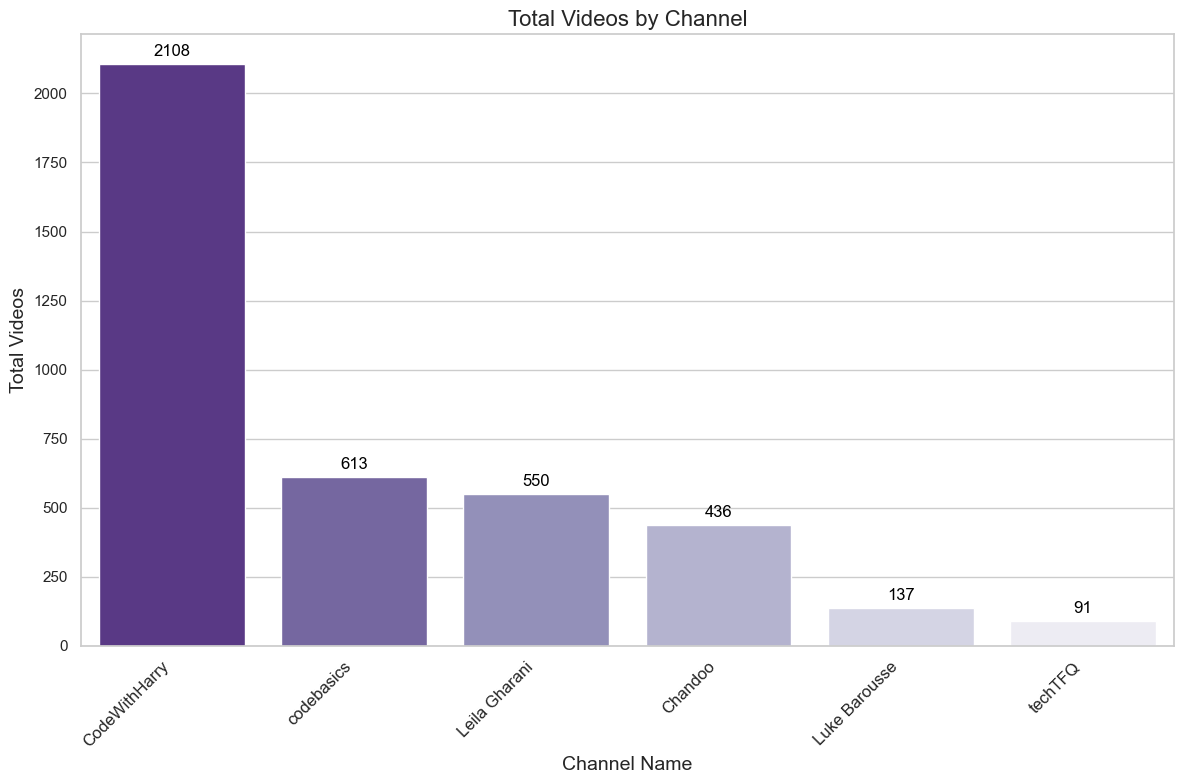

In [232]:
# # Create a color mapping for each category
# color_palette = [sns.color_palette("Set2")[0]]

# Create a bar chart for Total Videos
def create_bar_chart(category):
    plt.figure(figsize=(12, 8))

    # Order the bars based on the selected category
    channel_data_sorted = channel_data.sort_values(by=category, ascending=False)

    # Create the bar plot with the modified settings
    ax = sns.barplot(x="Channel_Name", y=category, data=channel_data_sorted, palette="Purples_r")

    # Set plot title and labels
    plt.title(f"{category.replace('_', ' ').title()} by Channel", fontsize=16)
    plt.xlabel("Channel Name", fontsize=14)
    plt.ylabel(category.replace('_', ' ').title(), fontsize=14)

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45, ha="right", fontsize=12)

    # Add data labels on top of the bars
    for p in ax.patches:
        ax.annotate(format(p.get_height(), ".0f"), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha = "center", va = "center", 
                    xytext = (0, 9), 
                    textcoords = "offset points",
                    fontsize=12,
                    color="black")

    # Show the plot
    plt.tight_layout()
    plt.show()

# Call the function for the "Total_Videos" category
create_bar_chart("Total_Videos")


#### Subscribers to View Ration

In [233]:
# 
channel_data = pd.DataFrame(channel_statistics)

# Convert columns to numeric
channel_data["Total_Subscribers"] = pd.to_numeric(channel_data["Total_Subscribers"], errors="coerce")
channel_data["Total_Views"] = pd.to_numeric(channel_data["Total_Views"], errors="coerce")

# Calculate subscriber-to-view ratio
channel_data["Subscriber_View_Ratio"] = channel_data["Total_Subscribers"] / channel_data["Total_Views"]

# Print the result
print(channel_data[["Channel_Name", "Subscriber_View_Ratio"]])

    Channel_Name  Subscriber_View_Ratio
0        techTFQ                    0.0
1        Chandoo                    0.0
2  Luke Barousse                    0.0
3     codebasics                    0.0
4  CodeWithHarry                    0.0
5  Leila Gharani                    0.0


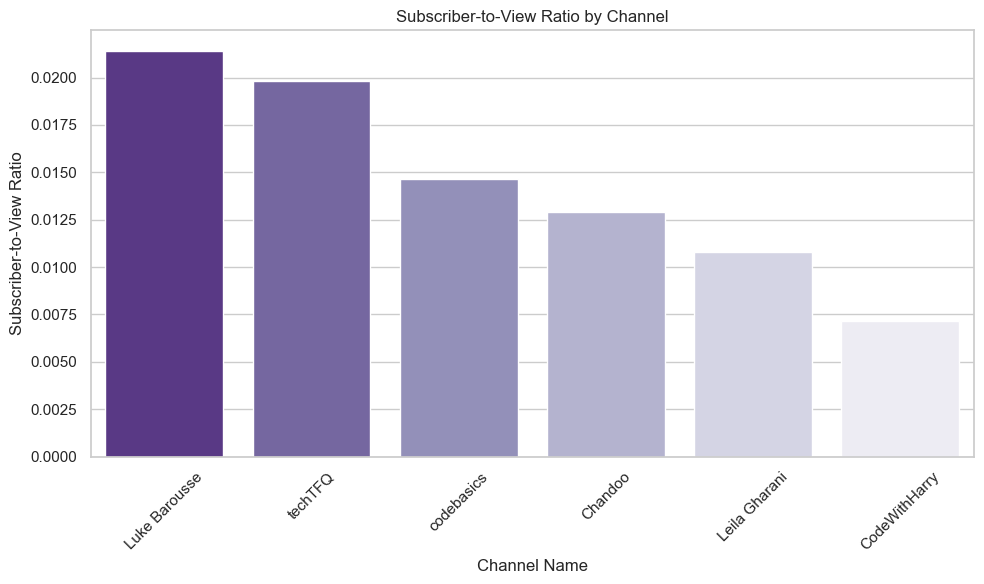

In [234]:
# Let's Create visual 
channel_data = pd.DataFrame(channel_statistics)

# Convert columns to numeric
channel_data["Total_Subscribers"] = pd.to_numeric(channel_data["Total_Subscribers"], errors="coerce")
channel_data["Total_Views"] = pd.to_numeric(channel_data["Total_Views"], errors="coerce")

# Calculate subscriber-to-view ratio
channel_data["Subscriber_View_Ratio"] = channel_data["Total_Subscribers"] / channel_data["Total_Views"]


# Order the bars based on Subscriber to View Ratio
channel_data_sorted = channel_data.sort_values(by="Subscriber_View_Ratio", ascending=False)

# Set Seaborn style
sns.set(style="whitegrid")

# Create the bar plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x="Channel_Name", y="Subscriber_View_Ratio", data=channel_data_sorted, palette = "Purples_r")
plt.title("Subscriber-to-View Ratio by Channel")
plt.xlabel("Channel Name")
plt.ylabel("Subscriber-to-View Ratio")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


##### Luke Barousse: High Engagement-to-Subscriber Ratio: The channel's view count of more than 17.2 million suggests that the content is attracting a considerable number of viewers despite having a subscriber base of only 0.4 million.This indicates a high engagement-to-subscriber ratio, meaning that a significant portion of subscribers actively watch and engage with the content, which shows's that there's potential to convert more viewers into subscribers.